## Following Kwame's ingesting lines from here:

https://github.com/neurodata/ndreg/blob/1c2c8215215102514d1a61194c1115fffb3f49a3/doc/3D_CLARITY_RegistrationAndAnalysis.ipynb

In [1]:
%matplotlib inline

In [2]:
from ndreg import *
import matplotlib
import ndio.remote.neurodata as neurodata

In [3]:
## Script used to download nii run on Docker
import nibabel as nb
inToken = "Aut1367"
nd = neurodata()
print(nd.get_metadata(inToken)['dataset']['voxelres'].keys())
inImg = imgDownload(inToken, resolution=5)

[u'1', u'0', u'3', u'2', u'5', u'4']


In [4]:
imgWrite(inImg, "./Aut1367.nii")

In [10]:
import nibabel as nib
import cv2

In [13]:
## Script from clviz_web_viz imgGet.py
(values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=100, range=(0,500))
print "level 5 brain obtained"
counts = np.bincount(values)
maximum = np.argmax(counts)

lowerThreshold = maximum
upperThreshold = sitk.GetArrayFromImage(inImg).max()+1

inImg = sitk.Threshold(inImg,lowerThreshold,upperThreshold,lowerThreshold) - lowerThreshold
print "applied filtering"

level 5 brain obtained
applied filtering


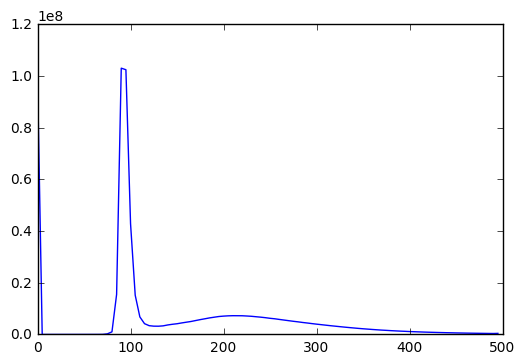

In [60]:
(values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=100, range=(0,500))
plt.plot(bins[:-1], values)

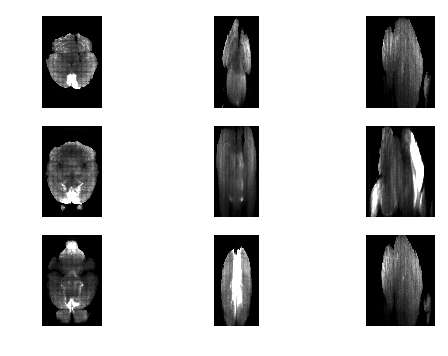

In [62]:
## Kwame's script
lowerThreshold = 100
upperThreshold = sitk.GetArrayFromImage(inImg).max()+1

inImg = sitk.Threshold(inImg,lowerThreshold,upperThreshold,lowerThreshold) - lowerThreshold
imgShow(inImg, vmax = 500)

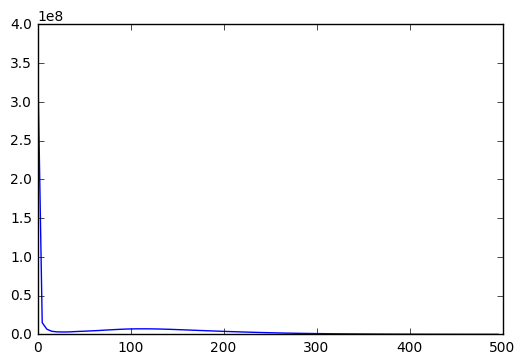

In [63]:
(values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=100, range=(0,500))
plt.plot(bins[:-1], values)

In [64]:
imgWrite(inImg, "./Aut1367Threshold.nii")

In [65]:
print type(inImg)

<class 'SimpleITK.SimpleITK.Image'>


In [66]:
"""Applies local equilization to the img's histogram and outputs a .nii file"""
print('Generating Histogram...')
path = os.getcwd()
im = nib.load(path + "/" + "Aut1367Threshold.nii")

im = im.get_data()
img = im[:,:,:]

shape = im.shape
#affine = im.get_affine()

x_value = shape[0]
y_value = shape[1]
z_value = shape[2]

#####################################################

imgflat = img.reshape(-1)

#img_grey = np.array(imgflat * 255, dtype = np.uint8)

#img_eq = exposure.equalize_hist(img_grey)

#new_img = img_eq.reshape(x_value, y_value, z_value)
#globaleq = nib.Nifti1Image(new_img, np.eye(4))

#nb.save(globaleq, '/home/albert/Thumbo/AutAglobaleq.nii')

######################################################

#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

img_grey = np.array(imgflat * 255, dtype = np.uint8)
#threshed = cv2.adaptiveThreshold(img_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)

cl1 = clahe.apply(img_grey)

#cv2.imwrite('clahe_2.jpg',cl1)
#cv2.startWindowThread()
#cv2.namedWindow("adaptive")
#cv2.imshow("adaptive", cl1)
#cv2.imshow("adaptive", threshed)
#plt.imshow(threshed)

localimgflat = cl1 #cl1.reshape(-1)

newer_img = localimgflat.reshape(x_value, y_value, z_value)
localeq = nib.Nifti1Image(newer_img, np.eye(4))

Generating Histogram...


In [67]:
print type(newer_img)

<type 'numpy.ndarray'>


In [68]:
print type(localeq)
print newer_img.shape
print localeq.shape

<class 'nibabel.nifti1.Nifti1Image'>
(595, 912, 1225)
(595, 912, 1225)


In [69]:
## Convert back into simpleITK image
Aut1367_histeq_ITK = sitk.GetImageFromArray(newer_img, isVector=False)

In [70]:
imgWrite(Aut1367_histeq_ITK, "./Aut1367LocalHistEq.nii")

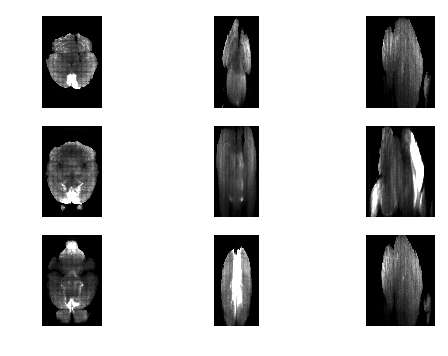

In [71]:
imgShow(inImg, vmax = 500)

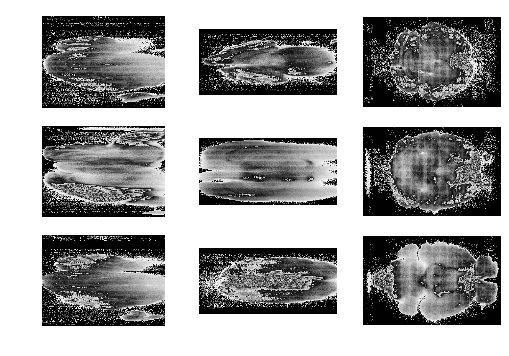

In [72]:
## post thresholding + local histogram equalization
imgShow(Aut1367_histeq_ITK)

In [83]:
print Aut1367_histeq_ITK.GetSize()

## Z, Y, X:

(1225, 912, 595)


In [86]:
## I made an Open Connectome account
## I then made a dataset/project.
## The dataset is called "Aut1367_histeq", the token is "Aut1367_tony", the channel is "histogram_equalization"
## I set the X image size, Y image size, Z image size on my ndstore dataset to the values from above.

token = "Aut1367_tony"
channel = "histogram_equalization"
imgUpload(Aut1367_histeq_ITK, token, channel, resolution=0)

NameError: global name 'datasetSize' is not defined